<a href="https://colab.research.google.com/github/RezuanChowdhuryRifat/SETI-Signal-Classification/blob/main/KNN_Classifier_with_ResNet101_feature_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.resnet import ResNet101
import tensorflow as tf




# Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/dataset/
# !unzip "/content/drive/MyDrive/dataset/primary_extra_small.zip"

/content/drive/MyDrive/dataset


**Image Processing**

In [4]:

train_path = "/content/drive/MyDrive/dataset/primary_extra_small/train"
test_path = "/content/drive/MyDrive/dataset/primary_extra_small/test"
valid_path = "/content/drive/MyDrive/dataset/primary_extra_small/valid"


SIZE = 256  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("/content/drive/MyDrive/dataset/primary_extra_small/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


# Capture validation data and labels into respective lists

valid_images = []
valid_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/dataset/primary_extra_small/valid/*"):
    fruit_label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        valid_images.append(img)
        valid_labels.append(fruit_label)

#Convert lists to arrays                
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Capture test data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/dataset/primary_extra_small/test/*"):
    fruit_label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(valid_labels)
valid_labels_encoded = le.transform(valid_labels)

x_train, y_train, x_test, y_test, x_valid, y_valid = train_images, train_labels_encoded,test_images, test_labels_encoded, valid_images, valid_labels_encoded

x_train, x_test = x_train / 255.0, x_test / 255.0

brightpixel
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1417_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1337_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1433_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1086_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1378_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1313_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1206_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1114_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1434_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1412_brightpixel.png
/content/drive/MyDrive/dataset/primary_extra_small/train/brightpixel/1138_brightpixel.pn

**Plot image**

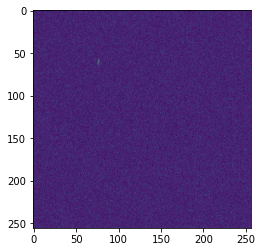

In [30]:
n=np.random.randint(0, x_train.shape[0])
img = x_train[n]
plt.imshow(img)


In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Model

**Feature Extractor**

In [5]:
resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

for layer in resnet101.layers:
	layer.trainable = False
    
resnet101.summary()

171446536/171446536 [==============================] - 8s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                       

**Training**

16/16 [==============================] - 3s 185ms/step
Training Accuracy =  0.4122448979591837


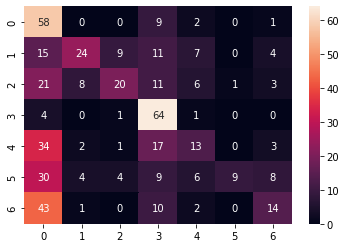

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

feature_extractor = resnet101.predict(x_train)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(features, y_train)

 #Now predict using the trained RF model. 
prediction_knn = knn.predict(features)
#Inverse le transform to get original label back. 
prediction_knn = le.inverse_transform(prediction_knn)

print ("Training Accuracy = ", metrics.accuracy_score(train_labels, prediction_knn))
cm = confusion_matrix(train_labels, prediction_knn)
sns.heatmap(cm, annot=True)




3/3 [==============================] - 0s 209ms/step
Validation Accuracy =  0.14285714285714285


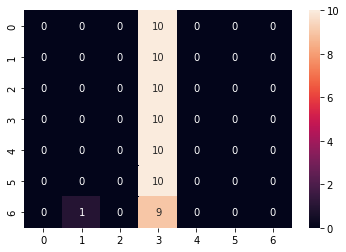

In [23]:
X_valid_feature = resnet101.predict(x_valid)
X_valid_features = X_valid_feature.reshape(X_valid_feature.shape[0], -1)

 #Now predict using the trained RF model. 
prediction_knn = knn.predict(X_valid_features)
#Inverse le transform to get original label back. 
prediction_knn = le.inverse_transform(prediction_knn)

print ("Validation Accuracy = ", metrics.accuracy_score(valid_labels, prediction_knn))
cm2 = confusion_matrix(valid_labels, prediction_knn)
sns.heatmap(cm2, annot=True)

**Testing**

5/5 [==============================] - 1s 196ms/step
Testing Accuracy =  0.34285714285714286


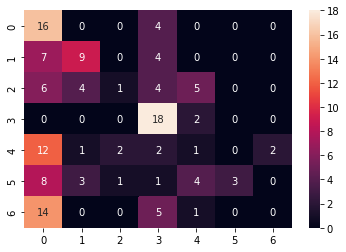

In [24]:
X_test_feature = resnet101.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

 #Now predict using the trained RF model. 
prediction_knn = knn.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_knn = le.inverse_transform(prediction_knn)

print ("Testing Accuracy = ", metrics.accuracy_score(test_labels, prediction_knn))
cm3 = confusion_matrix(test_labels, prediction_knn)
sns.heatmap(cm3, annot=True)

1/1 [==============================] - 0s 445ms/step
The prediction for this image is:  ['noise']
The actual label for this image is:  noise


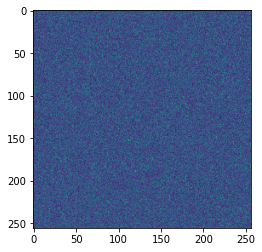

In [31]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=resnet101.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_knn = knn.predict(input_img_features)[0] 
prediction_knn = le.inverse_transform([prediction_knn])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_knn)
print("The actual label for this image is: ", test_labels[n])